## 1. Download data and import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabete = load_diabetes(as_frame=True).frame

diabete.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## 2. Quick look at the dataset

In [2]:
diabete.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'bp'}>, <Axes: title={'center': 's1'}>,
        <Axes: title={'center': 's2'}>],
       [<Axes: title={'center': 's3'}>, <Axes: title={'center': 's4'}>,
        <Axes: title={'center': 's5'}>],
       [<Axes: title={'center': 's6'}>,
        <Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

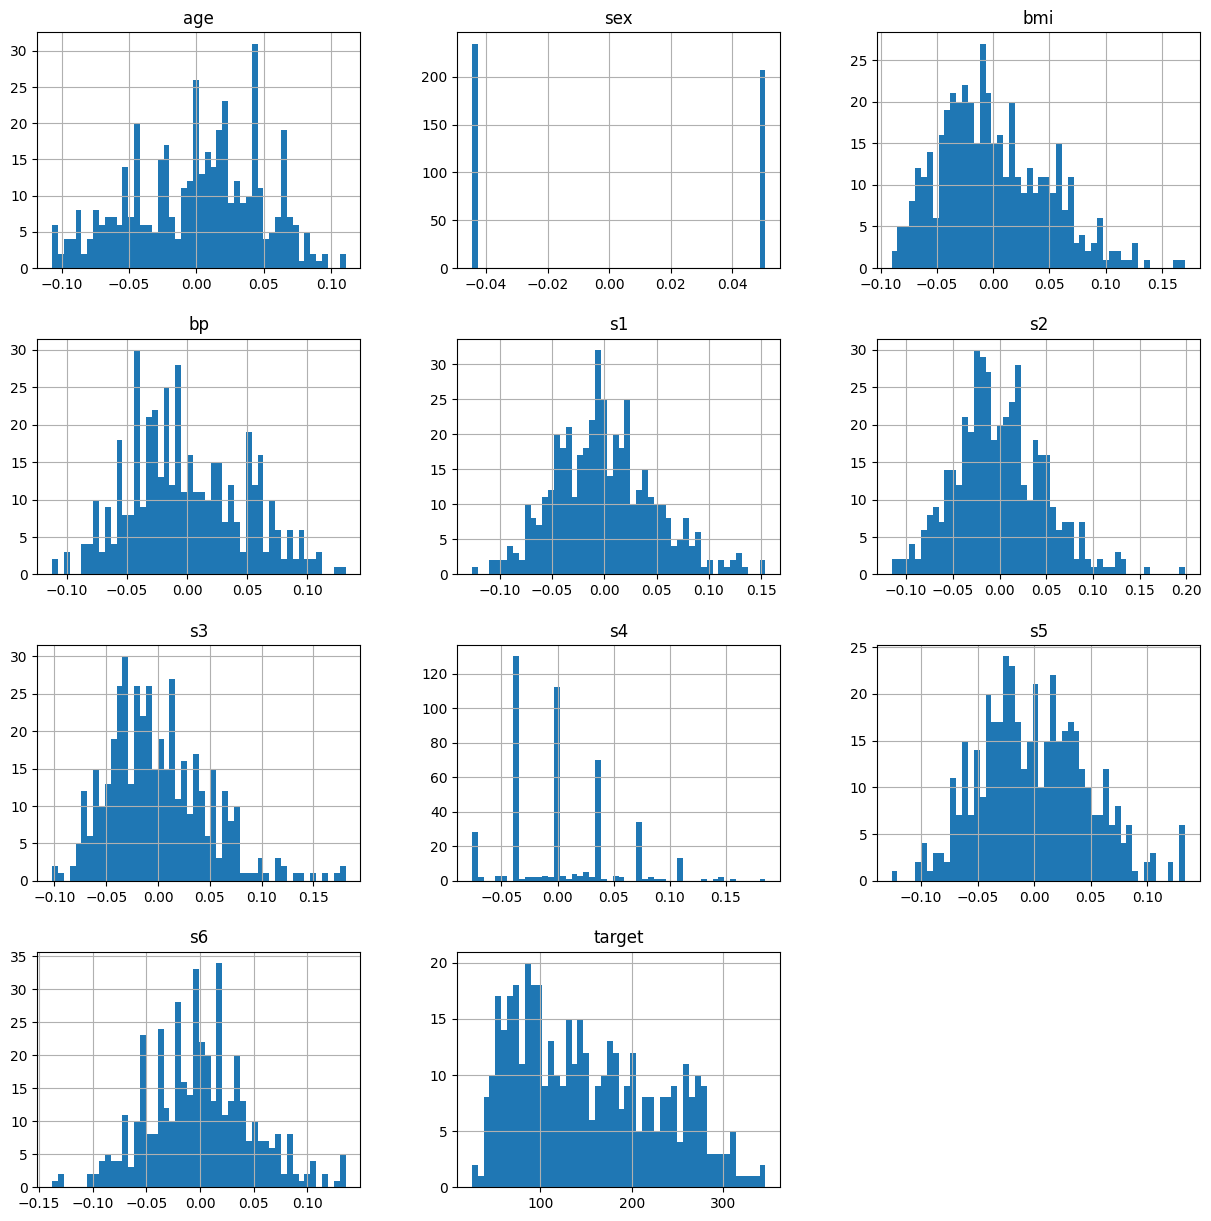

In [3]:
diabete.hist(bins=50, figsize=(15,15))

## 3. Split the data into Test and Train set

<Axes: >

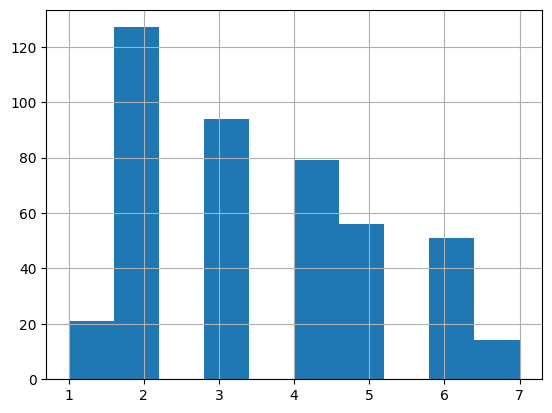

In [4]:
diabete['target_cat'] = pd.cut(diabete['target'],bins=[0,50,100,150,200,250,300,np.inf], labels=[1,2,3,4,5,6,7])
diabete['target_cat'].hist()

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_index, test_index in split.split(diabete,diabete['target_cat']):
    strat_test_set = diabete.loc[test_index]
    strat_train_set = diabete.loc[train_index]

strat_test_set['target_cat'].value_counts() / len(strat_test_set)

target_cat
2    0.292135
3    0.213483
4    0.179775
5    0.123596
6    0.112360
1    0.044944
7    0.033708
Name: count, dtype: float64

In this way our test and train set are chosen based in the frequency of each target interval

In [6]:
#Now we can remove the added column
for set_ in (strat_test_set,strat_train_set,diabete):
    set_.drop("target_cat",axis = 1, inplace=True)

## 4. Looking for correlations

In [7]:
corr_matrix = diabete.corr()
corr_matrix["target"].sort_values(ascending=False)

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64

Based on the correlation values we can drop `sex` column from the dataset. However I will keep it for now and check if I can better result with removing it.
Also as the data does not need any feature scaling, I will go to training the model

## 5. Training the model 

In [8]:
train_set_X = strat_train_set.drop(['target'],axis=1)
train_set_y = strat_train_set['target']

test_set_X = strat_test_set.drop(['target'],axis=1)
test_set_y = strat_test_set['target']


In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_set_X,train_set_y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 6. Evaluation using Cross-validation



In [10]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg,test_set_X,test_set_y,scoring="neg_mean_squared_error",cv=10)

tree_rmse_scores = (-scores)

In [11]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:",scores.mean())
  print("Standard deviation:",scores.std())

In [12]:
display_scores(tree_rmse_scores)

Scores: [1709.53015969 6785.68426291 3888.72092645 2078.54163536 2438.51816093
 2777.06552232 4506.45233024 3857.07910387 4633.93967844 2595.06576422]
Mean: 3527.0597544438665
Standard deviation: 1451.2196167758582


In [13]:
scores = cross_val_score(lin_reg,test_set_X,test_set_y,scoring="r2",cv=5)
r2_score = scores
display_scores(r2_score)

Scores: [0.29714359 0.60117437 0.4297421  0.2018757  0.40123091]
Mean: 0.38623333508099267
Standard deviation: 0.13434456536552455
